<h1>Breast Cancer Research Noteboook</h1>

Aluno: João Pedro Amaral Dias   
Nº: 42055   
Disciplina: Aprendizagem   

- <a href='#1'>1. Análise do Problema</a>  
- <a href='#2'>2. Carregar bibliotecas e leitura do dataset</a>  
    - <a href='#2.1'>2.1. Carregar bibliotecas</a> 
    - <a href='#2.2'>2.2. Leitura do dataset</a> 
    - <a href='#2.3'>2.3. Exemplos</a> 
    - <a href='#2.4'>2.4. Valores em falta</a> 
- <a href='#3'>3. Análise do Dataset</a> 
    - <a href='#3.1'>3.1. Funções Head e describe</a> 
    - <a href='#3.2'>3.2. Atributos do dataset</a> 
    - <a href='#3.3'>3.3. Distribuição de atributos</a> 
    - <a href='#3.4'>3.4. Matriz de coorelação entre atributos</a> 
- <a href='#4'>4. Algoritmos em estudo</a> 
    - <a href='#4.1'>4.1. Random Forest (Modelo Lógico)</a> 
    - <a href='#4.2'>4.2. Support Vector Machines (Modelo Geométrico)</a> 
    - <a href='#4.3'>4.3. Naives Bayes (Modelo Probabilistico)</a> 
- <a href='#5'>5. Avaliação</a> 
    - <a href='#5.1'>5.1. Medida de desempenho</a> 
    - <a href='#5.2'>5.2. Procedimento de avalição</a> 
    - <a href='#5.3'>5.3. Função de avalição</a>
- <a href='#6'>6. Preparação do dataset</a> 
    - <a href='#6.1'>6.1. Standarização do dataset</a> 
    - <a href='#6.2'>6.2. Seleção de atributos</a>
    - <a href='#6.3'>6.3. Divisão conjunto de treino e de teste</a>
- <a href='#7'>7. Classificador Moda</a> 
    - <a href='#7.1'>7.1. Fitting</a> 
    - <a href='#7.2'>7.2. Resultados</a> 
    - <a href='#7.3'>7.3. Análise</a> 
- <a href='#8'>8. Classificador Random Forest</a> 
    - <a href='#8.1'>8.1. Primeira experiência</a> 
    - <a href='#8.2'>8.2. Fine-Tunning dos parametros</a> 
    - <a href='#8.3'>8.3. Resultados</a> 
    - <a href='#8.4'>8.4. Análise</a> 
- <a href='#9'>9. Classificador SVM</a> 
    - <a href='#9.1'>9.1. Primeira experiência</a> 
    - <a href='#9.2'>9.2. Fine-Tunning dos parametros</a> 
    - <a href='#9.3'>9.3. Resultados</a> 
    - <a href='#9.4'>9.4. Análise</a> 
- <a href='#10'>10. Classificador Naive Bayes</a> 
    - <a href='#10.1'>10.1. Primeira experiência</a> 
    - <a href='#10.2'>10.2. Fine-Tunning dos parametros</a> 
    - <a href='#10.3'>10.3. Resultados</a> 
    - <a href='#10.4'>10.4. Análise</a>
- <a href='#11'>11. Resultados nos Conjuntos de Teste</a> 
    - <a href='#11.1'>11.1. Dataset Inicial</a> 
    - <a href='#11.2'>11.2. Dataset Optimizado</a>  
- <a href='#12'>12. Conclusão</a> 

# <a id='1'>1. Análise do Problema</a> 



No ambito deste problema pretende-se desenvolver um modelo, que perante um dataset com
informações sobre exames ao cancro da mama, preveja se um tumor é benigno ou maligno. É por
isso um problema de classificação binário supervisionado, onde as duas classes em estudo são ‘Benigno’ e
‘Maligno’.

Na construção do modelo será usado a junção de dois datasets diferentes, BCDR_D01 e
BDCR_D02 que possuem dados com os mesmo atributos. Foi assim necessário numa fase inicial juntar os dois ficheiros com auxilio da ferramenta Excel gerando um só dataset.

# <a id='2'>2. Carregar bibliotecas e leitura do dataset</a> 

## <a id='2.1'>2.1. Carregar bibliotecas</a> 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

from sklearn.impute import KNNImputer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from pprint import pprint
from scipy import stats 

## <a id='2.2'>2.2. Leitura do dataset</a>

In [5]:
dataset = pd.read_csv('sample_data/bcdr_d01_do2_features.csv', na_values=['nan'])
X = dataset.iloc[:, 1:43].values
Y = dataset.iloc[:, 43].values

In [6]:
dataset['classification'] = dataset['classification'].map({'Malign':1,'Benign':0})

De modo a evitar duplicados, todos os registos com os mesmos valores em todos os atributos foram removidos do ficheiro csv final a utilizar, durante o processo de junção dos dois datasets BCDR_D01 e BDCR_D02.

## <a id='2.3'>2.3. Exemplos</a>


In [7]:
dataset.shape

(542, 44)

In [8]:
dataset.groupby('classification').size()

classification
0    465
1     77
dtype: int64

O dataset usado é então composto por 542 exemplos, denominados por segmentações, que incluem
dados clínicos e descriptores de imagens geradas durante o exame ao cancro da mama a 193
pacientes.

A classificação destes exemplos encontra-se distribuida da seguinte forma:
* Benigno – 465
* Maligno – 77



## <a id='2.4'>2.4. Valores em falta</a>

In [9]:
dataset.isnull().sum().sum()

557

Visto que o dataset possui registos sem valores em alguns dos atributos, estes valores são preenchidos utilizando a estratégia KNNImputer, que consiste na utilização dos valores vizinhos para o preenchimento dos valores em falta.

In [10]:
imputer = KNNImputer(n_neighbors=2, weights="uniform")
dataset[:] = imputer.fit_transform(dataset)

# <a id='3'>3. Análise do Dataset</a> 



## <a id='3.1'>3.1. Funções Head e Describe</a>

In [11]:
dataset.head()

,patient_id,study_id,series,lesion_id,segmentation_id,image_view,mammography_type,mammography_nodule,mammography_calcification,mammography_microcalcification,mammography_axillary_adenopathy,mammography_architectural_distortion,mammography_stroma_distortion,age,density,i_mean,i_std_dev,i_maximum,i_minimum,i_kurtosis,i_skewness,s_area,s_perimeter,s_x_center_mass,s_y_center_mass,s_circularity,s_elongation,s_form,s_solidity,s_extent,t_energ,t_contr,t_corr,t_sosvh,t_homo,t_savgh,t_svarh,t_senth,t_entro,t_dvarh,t_denth,t_inf1h,t_inf2h,classification
0,2.0,3.0,1.0,5.0,6.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,62.0,1.0,0.84966,0.094347,1.0,0.56078,-0.61935,0.13331,758.0,100.9117,0.33148,0.64227,0.93540,0.91348,0.015201,0.97806,0.76411,0.016986,14.9935,-0.000931,740.4655,0.37143,54.1492,2662.4732,2.6950,4.3415,14.9935,2.1367,-0.050623,0.44845,0.0
1,2.0,3.0,1.0,5.0,7.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,62.0,1.0,0.91679,0.099394,1.0,0.51373,0.38072,-1.02000,905.0,111.7401,0.29297,0.47822,0.91084,0.92017,0.014202,0.97838,0.76178,0.041382,20.0630,-0.082696,846.6704,0.38186,57.8790,3071.1647,2.6133,3.9391,20.0630,2.2245,-0.052866,0.43563,0.0
2,2.0,3.0,1.0,6.0,8.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,62.0,1.0,0.93062,0.133860,1.0,0.40000,2.67960,-1.95820,776.0,106.8112,0.74685,0.56400,0.85475,0.73694,0.012679,0.96517,0.67655,0.189040,36.8709,-0.118260,905.8036,0.54930,59.6439,3320.0736,2.2776,2.9462,36.8709,2.1957,-0.075392,0.44985,0.0
3,2.0,3.0,1.0,6.0,9.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,62.0,1.0,0.94725,0.101290,1.0,0.40784,4.68550,-2.22220,837.0,113.0538,0.82773,0.36289,0.82293,0.70624,0.011924,0.94898,0.68832,0.198930,17.4251,-0.016056,932.3142,0.57982,60.7882,3457.9421,2.1277,2.7731,17.4251,1.9692,-0.062953,0.40322,0.0
4,3.0,4.0,1.0,7.0,10.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,74.0,1.0,0.85478,0.096944,1.0,0.54118,-0.98733,-0.14516,35215.0,881.5778,0.13751,0.28846,0.56940,0.63021,0.001972,0.82342,0.53535,0.017609,3.9515,0.777670,774.6703,0.52281,55.3474,2771.1561,3.0068,4.3143,3.9515,1.5656,-0.190550,0.77071,1.0


In [12]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
patient_id,542.0,231.736162,157.023217,2.000000,99.000000,199.500000,364.000000,511.000000
study_id,542.0,325.177122,223.602602,3.000000,137.000000,274.000000,514.250000,844.000000
series,542.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
lesion_id,542.0,199.684502,113.727656,5.000000,106.000000,195.500000,291.000000,407.000000
segmentation_id,542.0,392.605166,228.401904,6.000000,200.250000,383.500000,575.750000,807.000000
image_view,542.0,2.577491,1.113059,1.000000,2.000000,3.000000,4.000000,4.000000
mammography_type,542.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
mammography_nodule,542.0,0.263838,0.441119,0.000000,0.000000,0.000000,1.000000,1.000000
mammography_calcification,542.0,0.787823,0.409227,0.000000,1.000000,1.000000,1.000000,1.000000
mammography_microcalcification,542.0,0.084871,0.278947,0.000000,0.000000,0.000000,0.000000,1.000000


## <a id='3.2'>3.2. Atributos do Dataset</a>

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 44 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            542 non-null    float64
 1   study_id                              542 non-null    float64
 2   series                                542 non-null    float64
 3   lesion_id                             542 non-null    float64
 4   segmentation_id                       542 non-null    float64
 5   image_view                            542 non-null    float64
 6   mammography_type                      542 non-null    float64
 7   mammography_nodule                    542 non-null    float64
 8   mammography_calcification             542 non-null    float64
 9   mammography_microcalcification        542 non-null    float64
 10  mammography_axillary_adenopathy       542 non-null    float64
 11  mammography_archite

O dataset fornecido contém um total de 38 atributos referentes a dados clínicos e descritores de
imagens, gerados por um programa de tratamento de imagem.

É possível dividir estes 38 atributos em quatro categorias:
* **Dados clínicos e gerais** : nesta categoria temos atributos gerais como a idade, a densidade, o
tipo de imagem e os atributos que contem o prefixo ‘mammography’. Estes últimos são
dados boleanos que revelam se o paciente contém a condição mencionada.

* **Descriptores de intensidade** : são os atributos que tem como prefixo ‘i_’ e são
computacionados sobre os níveis da cor cinzenta da imagem do exame, apenas na área
assinalada pelo radiologista.

* **Descriptores de textura** : são os atributos com prefixo ‘t_’ e são o resultado da computação
da matriz de co-ocorrencia de níveis de cinza, na área assinalada pelo radiologista.

* **Descriptores de forma e localização** : esta última categoria de atributos é identificada pelo
prefixo ‘s_’ e define o tamanho e a localização da área assinalada pelo radiologista.

## <a id='3.3'>3.3. Distribuiçãão de Atributos</a>

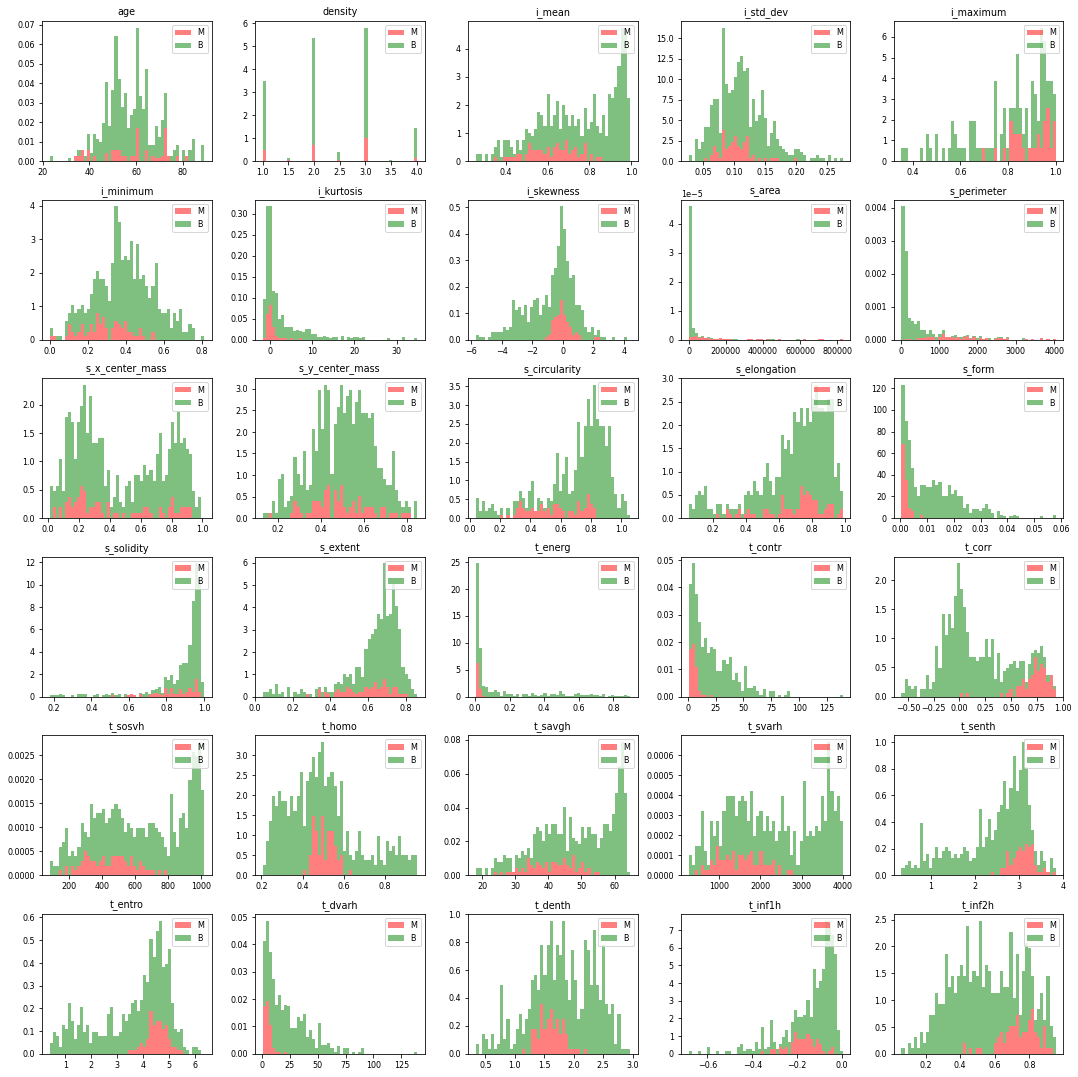

In [14]:
features_mean=list(dataset.columns[13:43])

M = dataset[(dataset['classification'] == 1)]
B = dataset[(dataset['classification'] == 0)]

plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(15,15))
axes = axes.ravel()

for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(dataset[features_mean[idx]]) - min(dataset[features_mean[idx]]))/50
    ax.hist([M[features_mean[idx]],B[features_mean[idx]]], bins=np.arange(min(dataset[features_mean[idx]]), max(dataset[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, density = True, label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
    
plt.tight_layout()
plt.show()

Após analise dos gráficos gerados anteriormente é possivel retirar algumas conclusões:
* Conseguimos observar a exemplos de tumores malignos e negativos em qualquer idade;
* Podemos observar ainda que quanto menor o perimetro do tumor, menor é a probabilidade de o tumor ser maligno;
* A area tambem é um atributo muito interessante, porque quanto menor a àrea menor a probabilidade de o tumor ser maligno. Podemos por isso relacionar este ponto com o anteriror;
* Apenas conseguimos observar exemplos de tumores malignos no atributo t_homo no intervalo entre [0.4 , 0.62];
* No caso do atributo t_dvarh apenas se observam exemplos de tumores malignos para valores inferiores a 25;

## <a id='3.4'>3.4. Coorrelação entre Atributos</a>

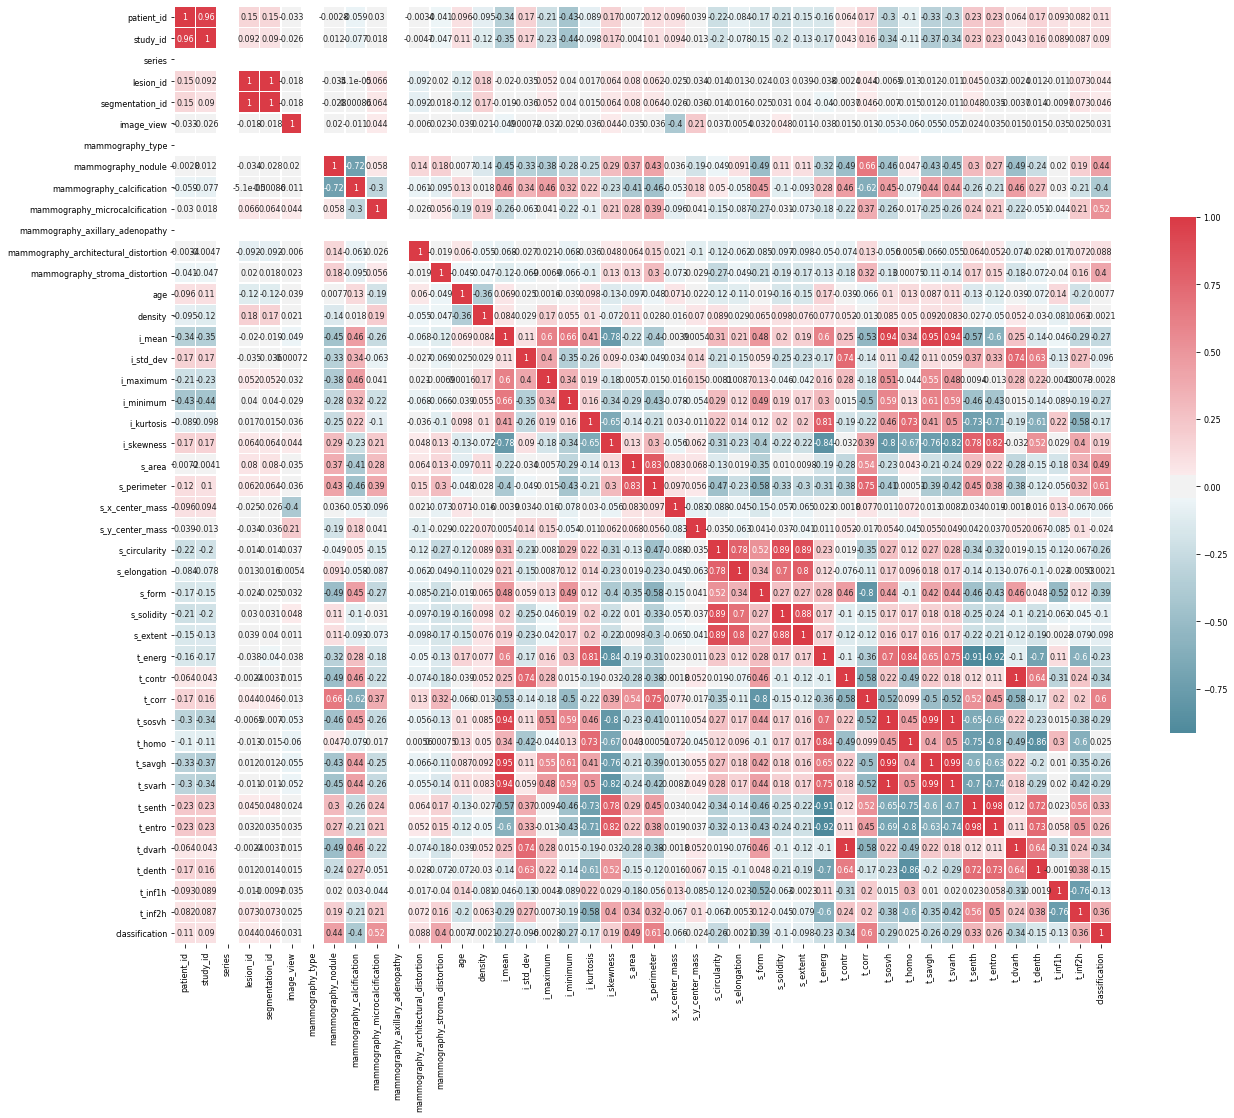

In [15]:
corr = dataset.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
f, ax = plt.subplots(figsize=(21, 19))
sns.heatmap(corr, cmap=cmap, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

Ao analisar a matriz de correlação entre os atributos, é possivel notar dois nucleos de atributos com maior grau de correlação entre eles:
* No primeiro grupo temos os atributos s_circularity, s_elongation, s_form, s_solidity, s_extend;
* O segundo nucleo engloba os seguintes atributos t_sosvh, t_homo, t_savgh, t_svarh;

# <a id='4'>4. Algoritmos em estudo</a> 

## <a id='4.1'>4.1. Random Forest (Modelo Lógico)</a>

Random Forest é um algoritmo de aprendizagem que pode ser usado tanto em problemas de classificação como de regressão, e consiste na criação de várias árvores de decisão consoante os atributos do dataset utilizado. No processo de classificação cada árvore indica a classe mais apropriada e a moda final é a classe escolhida. Este algoritmo foi escolhido para este problema pois é extremamente versátil, podendo ser usado em vários tipos de problema, e altamente escalável.
   
   Alguns dos parametro presentes neste modelo são definidos em seguida:
   * Max_features (default = auto) - numero maximo de atributos que podem ser considerados na criação de cada árvore de decisão. Este parametro impacta a performance e a velocidade do classificador na medida em que quantos mais atributos melhor será a performance mas pior será a velocidade.
   
   * n_estimators (default = 100) - numero máximo de árvores a criar antes de se fazer a previsão. O impacto será semelhante ao atributo anterior.
   
   * min_samples_leaf (default = 1) - numero minimo de exemplos que deve haver nos nós de cada árvore.
   
   * bootstrap (default = true) - define se todo o dataset deve ser utilizado para construir cada árvore.

## <a id='4.2'>4.2. Support Vector Machines (Modelo Geométrico)</a>

SVM é um algoritmo de aprendizagem supervisionado e consiste na representação dos exemplos do dataset no espaço, tentando assim encontrar uma separação entre o mapeamento de dois ou mais atributos. 

   Foi uma das escolhas pois é um algoritmo altamente usado no reconhecimento de padrões e ainda em problemas de classificação binário, em especial deteção de doenças comuns. 
   
   Alguns dos parametro presentes neste modelo são definidos em seguida:
   * c (default = 1.0) - parametero de regularização. Quanto maior o valor neste parametro maior será o numeros de casos corretos no conjunto de treino.
   
   * kernel (default = 'rbf') - determina que kernel vai ser usado pelo algoritmo. As opções são 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' ou uma chamada.
   
   * gamma (default = ) - é um parametro para hiperplanos não lineares e quanto maior for mais preciso será no método fit do conjunto de treino. Mas consequentemente pode originar overfitting.
   
   * degree (default = 3) - grau polinomial quando a função kernel é poli.

## <a id='4.3'>4.3. Naives Bayes (Modelo Probabilistico)</a>

Este ultimo algoritmo probabilístico é muito fácil de construir e muito útil em datasets de grandes dimensões. Usa como estratégia o facto de assumir que todos os atributos são independentes entre sim.
   
   Este algoritmo contém apenas dois parametros, descritos em seguida:
   * priors - probabilidades prévias das classes a prever.
   
   * var_smoothing (default = 1e-9) - Porção da maior variancia entre todos os atributos.

# <a id='5'>5. Avaliação</a> 


## <a id='5.1'>5.1. Medida de desempenho</a>

Antes de escolher uma medida de desempenho é importante definir uma *confusion matrix* para melhor perceber as fórmulas a aplicar.

|                         |**Malign (Positive)**|**Benign (Negative)**|
|:-----------------------:|:-------------------:|:-------------------:|
|  **Malign (Positive)**  |  True Positive (TP) | False Negative (FN) |
|  **Benign (Negative)**  | False Positive (FP) |  True Negative (TN) |
 
 
No contexto do problema é possivel perceber que haverá uma maior preocupação na previsão de casos positivos (tumor maligno), e tambem que em termos de performance, será pior o modelo prever um false negative (benigno quando na verdade é maligno) do que um false positive (maligno quando na verdade é benigno).

Os pontos previamente referidos acrescentados ao facto de o conjunto de testes ser desequilibrado, no ambito de haver significamente mais resultados negativos do que positivos (465, 77), faz pender a escolha de um metodo de desempenho sobre o método *f1 score*.

Para puder usar este método é necessário introduzir o conceito de *precision* e *recall*. 

* Precision (TP / (TP + FP)) - Consiste em calcular o quao preciso o modelo é, quando preve a classe positiva (maligno).
   
* Recall (TP / (TP + FN)) - Consiste em calcular quantos dos exemplos positivos são correctamente identificados pelo modelo.

Usando estas duas métricas o score F1 é calculado do seguinte modo.

F1 = 2 * ((Precision * Recall) / (Precision + Recall))

## <a id='5.2'>5.2. Procedimento de avaliação</a>

Para proceder à avaliação do modelo será usado o procedimento de ***cross validation***. Para este procedimento, como o dataset em estudo não é muito extenso não o poderemos simplesmente dividir em k partes com tamanho n, e avaliar cada parte individualmente, pelo que teremos de optar por uma solução alternativa de *cross validation*. 

Esta solução alternativa, consiste em partir aleatoriamente a data à disposição em k partes, alocando uma dessas partes para teste e usando as restantes k-1 partes para treinar o modelo. A avaliação será feita na parte alocada para teste e este processo será repetido k vezes, até cada parte ter sido usada como teste.

**Nota:** Para esta experiência vamos considerar k = 10.

In [16]:
# Mantem a distribuição de classes
skf = StratifiedKFold(n_splits=10, random_state=2, shuffle=True)

## <a id='5.3'>5.3. Função de avaliação</a>

A função a baixo calcula o valor de f1, da cobertura e da precisão para cada fold referente ao modelo recebido como argumento.

In [17]:
def evaluate_function (model, crossValidation, f1score, precision, recall, X_set, Y_set):
    
    for train_index, test_index in crossValidation.split(X_set,Y_set):
        X_val_train, X_val_test = X_set[train_index], X_set[test_index]
        y_val_train, y_val_test = Y_set[train_index], Y_set[test_index]
        
        model.fit(X_val_train, y_val_train)
        y_pred = model.predict(X_val_test)
        
        cm = confusion_matrix(y_val_test, y_pred)
        
        tp = cm[1,1]
        fn = cm[1,0]
        fp = cm[0,1]
        tn = cm[0,0]
        
        f1score.append(f1_score(y_val_test, y_pred, pos_label = 1))
        precision.append(tp/(tp+fp))
        recall.append(tp/(tp+fn))

# <a id='6'>6. Preparação do dataset</a> 

## <a id='6.1'>6.1. Remoção de Atributos</a>

No dataset existem atributos que são insignificantes para a tarefa de classificação, pelo que podem ser removidos. A sua insignificancia deve-se ao facto dos valores para estes atributos serem sempre iguais ou serem sempre diferentes. Neste último caso temos os atributos que representam ids, como patient_id ou study_id.

In [18]:
new_dataset = pd.DataFrame(dataset, columns=dataset.columns)
new_dataset.drop(['patient_id','study_id','series','lesion_id','segmentation_id','mammography_type','mammography_axillary_adenopathy'], axis = 1,inplace = True)

## <a id='6.2'>6.2. Standarização do dataset</a>

De maneira a que alguns atributos não se sobreponham a outros por terem um leque de valores mais amplos, é necessário uniformizar os dados. Para isso é utilizada a função MinMaxScaler, que uniformiza todos os atributos do dataset, de modo a ficarem todos com valores entre 0 e 1.

In [19]:
scaler = MinMaxScaler()
new_dataset[:] = pd.DataFrame(scaler.fit_transform(new_dataset))

In [20]:
new_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
image_view,542.0,0.525830,0.371020,0.0,0.333333,0.666667,1.000000,1.0
mammography_nodule,542.0,0.263838,0.441119,0.0,0.000000,0.000000,1.000000,1.0
mammography_calcification,542.0,0.787823,0.409227,0.0,1.000000,1.000000,1.000000,1.0
mammography_microcalcification,542.0,0.084871,0.278947,0.0,0.000000,0.000000,0.000000,1.0
mammography_architectural_distortion,542.0,0.007380,0.085669,0.0,0.000000,0.000000,0.000000,1.0
mammography_stroma_distortion,542.0,0.047970,0.213901,0.0,0.000000,0.000000,0.000000,1.0
age,542.0,0.529129,0.166401,0.0,0.424242,0.530303,0.621212,1.0
density,542.0,0.440959,0.300952,0.0,0.333333,0.333333,0.666667,1.0
i_mean,542.0,0.667213,0.249464,0.0,0.475592,0.699961,0.906467,1.0
i_std_dev,542.0,0.350829,0.166755,0.0,0.235414,0.335827,0.443739,1.0


## <a id='6.2'>6.2. Seleção de atributos</a>

Outro dos métodos a utilizar para melhor preparar o nosso dataset é o de seleccionar os atributos com maior influência para a previsão de resultados correctos. Deste modo, é feita a escolha dos 20 atributos mais influentes no dataset, recorrendo à função SelectKBest.

In [21]:
select_feature = SelectKBest(chi2, k=20).fit(new_dataset.drop('classification',axis = 1 ), new_dataset['classification'])

print('Score list:', select_feature.scores_)
print('Feature list:', new_dataset.columns)
select_feature

Score list: [1.36527710e-01 7.72118769e+01 1.80650107e+01 1.34540959e+02
 4.20455244e+00 8.39056041e+01 1.67433147e-03 4.98801849e-04
 3.69275790e+00 3.96600746e-01 1.22438715e-04 2.96795417e+00
 2.82122091e+00 9.32391591e-01 4.11200702e+01 5.24488038e+01
 4.23488476e-01 2.25546295e-02 2.54390604e+00 1.83573050e-04
 1.34047753e+01 1.73683077e-01 2.52737809e-01 1.16803195e+01
 8.19490093e+00 2.10867834e+01 6.00147117e+00 4.82721146e-02
 3.40310669e+00 6.64345722e+00 4.80126828e+00 3.63272657e+00
 8.19490093e+00 9.42206701e-01 3.38675145e-01 6.33912671e+00]
Feature list: Index(['image_view', 'mammography_nodule', 'mammography_calcification',
       'mammography_microcalcification',
       'mammography_architectural_distortion', 'mammography_stroma_distortion',
       'age', 'density', 'i_mean', 'i_std_dev', 'i_maximum', 'i_minimum',
       'i_kurtosis', 'i_skewness', 's_area', 's_perimeter', 's_x_center_mass',
       's_y_center_mass', 's_circularity', 's_elongation', 's_form',
       's

SelectKBest(k=20, score_func=<function chi2 at 0x7f014fe732f0>)

In [22]:
select_feature.transform(new_dataset.drop('classification',axis = 1))

array([[0.        , 1.        , 0.        , ..., 0.67713897, 0.10295217,
        0.43454786],
       [0.        , 1.        , 0.        , ..., 0.60801458, 0.13965032,
        0.42017842],
       [0.        , 1.        , 0.        , ..., 0.43745394, 0.26132286,
        0.43611707],
       ...,
       [1.        , 0.        , 0.        , ..., 0.54696387, 0.00706715,
        0.78835896],
       [1.        , 0.        , 0.        , ..., 0.39820215, 0.        ,
        0.74331154],
       [1.        , 0.        , 0.        , ..., 0.72228282, 0.03343018,
        0.74608007]])

In [23]:
selected_columns = np.array(new_dataset.drop('classification',axis = 1).columns)[select_feature.get_support()]
selected_columns

array(['mammography_nodule', 'mammography_calcification',
       'mammography_microcalcification',
       'mammography_architectural_distortion',
       'mammography_stroma_distortion', 'i_mean', 'i_minimum', 's_area',
       's_perimeter', 's_form', 't_energ', 't_contr', 't_corr', 't_sosvh',
       't_savgh', 't_svarh', 't_senth', 't_entro', 't_dvarh', 't_inf2h'],
      dtype=object)

## <a id='6.3'>6.3. Divisão conjunto de treino e de teste</a>

Antes de proceder à divisão em conjunto de treino e conjunto de testes é necessário distinguir os dois datasets que foram construidos ao longo de toda a análise do problema. O *dataset* contém todos os atributos e os valores de origem dos mesmos, enquanto que o *new_dataset* contém apenas os 20 atributos mais influentes e os seus valores uniformizados.

Iremos por isso ficar com dois conjuntos de treino e dois conjuntos de teste, sendo que o tamanho dos conjuntos de testes será de 30% o tamanho do dataset original.

In [24]:
X = dataset.iloc[:, 1:43].values
Y = dataset.iloc[:, 43].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [25]:
new_X = new_dataset.loc[:, selected_columns].values
new_Y = new_dataset.iloc[:, 36].values

new_X_train, new_X_test, new_Y_train, new_Y_test = train_test_split(new_X, new_Y, test_size=0.3, random_state=1)

# <a id='7'>7. Classificador Moda</a> 

Antes de aplicarmos os três algoritmos escolhidos anteriormentes, vamos aplicar um mais simples que terá como base para a previsão o calculo da moda no conjunto de treino. Este modelo apesar de muito básico irá fornecer-nos alguns resultados para analisar à partida.

Em baixo encontra-se a implementação do modelo.

In [26]:
class ModaClassificador:
    
    def fit(self, data, labels):
        self.moda = stats.mode(labels).mode[0];
        return stats.mode(labels)
    
    def predict(self, data):
        prediction = []
        for d in data:
            prediction.append(self.moda)
        return prediction
    

## <a id='7.1'>7.1. Fitting</a>

In [27]:
mode_model = ModaClassificador()

mode_model.fit(X_train, Y_train)

ModeResult(mode=array([0.]), count=array([327]))

## <a id='7.2'>7.2. Resultados</a>

Como a divisão do dataset é estratificada, de nada vale aplicar validação cruzada pois o resultado vai ser sempre o mesmo para cada um dos folds, pelo que podemos aplicar o modelo ao conjunto completo.

In [28]:
mode_pred = mode_model.predict(X_test)

cm = confusion_matrix(Y_test, mode_pred)   
tp = cm[1,1]
fn = cm[1,0]
fp = cm[0,1]
tn = cm[0,0]

mmf1score = f1_score(Y_test, mode_pred, pos_label = 1)
mmprecision = tp/(tp+fp)
mmrecall = tp/(tp+fn)

print("F1 Score        : " + str(mmf1score))
print("Precision Score : " + str(mmprecision))
print("Recall Score    : " + str(mmrecall))

F1 Score        : 0.0
Precision Score : nan
Recall Score    : 0.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in long_scalars
  # Remove the CWD from sys.path while we load stuff.


## <a id='7.3'>7.3. Análise</a>

Os resultados obtidos podem ser explicados pela grande quantidade de casos de treino negativos no dataset, originando que o valor previsto seja sempre tumor benigno.

# <a id='8'>8. Classificador Random Forest</a> 

## <a id='8.1'>8.1. Primeira experiência</a>

Numa primeira instancia o modelo random forest é construido com os parametros por default. O valor destes parametros pode ser consultado após fazer print do respetivo modelo.

In [29]:
base_rf_model = RandomForestClassifier()
print('Parametros default:\n')
pprint(base_rf_model.get_params())

Parametros default:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


## <a id='8.2'>8.2. Fine-Tunning dos parametros</a>

No caso do modelo random forest iremos utilizar a ferramenta *RandomizedSearchCV* do sklearn para desvendar quais as melhores combinações de argumentos para o dataset em estudo. Esta ferramenta pode ser utilizada definindo um intervalo de valores para os parametros do modelo. Estes valores irão ser combinados aleatoriamente gerando um modelo especifico. Neste caso iremos gerar 100 modelos aleatorios e usar uma validação cruzada com k=3.

In [30]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 10, stop = 110, num = 5)]
min_samples_split = [2, 5, 10, 15]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
criterion = ['gini', 'entropy']

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion':criterion}

Fine tunning do modelo aplicado ao dataset completo

In [31]:
rf_model_v1 = RandomForestClassifier()

rf_random_v1 = RandomizedSearchCV(estimator = rf_model_v1, param_distributions = random_grid, n_iter = 100,
                               cv = 3, verbose=4, random_state=0, n_jobs = -1)
rf_random_v1.fit(X_train, Y_train)

print('Os parametros do modelo Random Forest com melhor desempenho são os seguintes:\n')
pprint(rf_random_v1.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   45.0s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 217 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.1min finished


Os parametros do modelo Random Forest com melhor desempenho são os seguintes:

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 85,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 600}


Fine tunning do modelo aplicado ao dataset optimizado

In [32]:
rf_model_v2 = RandomForestClassifier()

rf_random_v2 = RandomizedSearchCV(estimator = rf_model_v2, param_distributions = random_grid, n_iter = 100,
                               cv = 3, verbose=4, random_state=0, n_jobs = -1)
rf_random_v2.fit(new_X_train, new_Y_train)

print('Os parametros do modelo Random Forest com melhor desempenho são os seguintes:\n')
pprint(rf_random_v2.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   41.4s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 217 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.6min finished


Os parametros do modelo Random Forest com melhor desempenho são os seguintes:

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 85,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 1400}


## <a id='8.3'>8.3. Resultados</a>

In [33]:
rff1score_v0 = []
rfprecision_v0 = []
rfrecall_v0 = []
evaluate_function(base_rf_model, skf, rff1score_v0, rfprecision_v0, rfrecall_v0, X_train, Y_train)

In [34]:
best_rf_v1 = rf_random_v1.best_estimator_

rff1score_v1 = []
rfprecision_v1 = []
rfrecall_v1 = []
evaluate_function(best_rf_v1, skf, rff1score_v1, rfprecision_v1, rfrecall_v1, X_train, Y_train)

In [35]:
best_rf_v2 = rf_random_v2.best_estimator_

rff1score_v2 = []
rfprecision_v2 = []
rfrecall_v2 = []
evaluate_function(best_rf_v2, skf, rff1score_v2, rfprecision_v2, rfrecall_v2, new_X_train, new_Y_train)

Vamos agora ver o resultado F1, a precisão e a cobertura de cada modelo Random Forest e para cada fold da validação cruzada.

In [36]:
score_table = pd.DataFrame({"F1 Score Default" :rff1score_v1,
                            "F1 Score Full" :rff1score_v1,
                            "F1 Score Optimizado" :rff1score_v2,
                            "Precision Default" :rfprecision_v1,
                            "Precision Full" :rfprecision_v1,
                            "Precision Optimizado" :rfprecision_v2,
                            "Recall Default" :rfrecall_v1,
                            "Recall Full" :rfrecall_v1,
                            "Recall Optimizado" :rfrecall_v2})

score_table

,F1 Score Default,F1 Score Full,F1 Score Optimizado,Precision Default,Precision Full,Precision Optimizado,Recall Default,Recall Full,Recall Optimizado
0,0.909091,0.909091,0.600000,0.833333,0.833333,0.600000,1.000000,1.000000,0.600000
1,0.714286,0.714286,0.714286,0.555556,0.555556,0.555556,1.000000,1.000000,1.000000
2,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000
3,0.571429,0.571429,0.750000,1.000000,1.000000,1.000000,0.400000,0.400000,0.600000
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5,0.888889,0.888889,0.666667,1.000000,1.000000,0.750000,0.800000,0.800000,0.600000
6,0.909091,0.909091,0.833333,0.833333,0.833333,0.714286,1.000000,1.000000,1.000000
7,0.727273,0.727273,0.615385,0.800000,0.800000,0.571429,0.666667,0.666667,0.666667
8,0.727273,0.727273,0.600000,0.800000,0.800000,0.750000,0.666667,0.666667,0.500000
9,0.833333,0.833333,0.545455,0.714286,0.714286,0.500000,1.000000,1.000000,0.600000


## <a id='8.4'>8.4. Análise</a>

In [37]:
print("Random Forest")
print("F1 Score  Default : %s" % "{0:.3%}".format(np.mean(rff1score_v0)),   
      "\tF1 Score  Full : %s" % "{0:.3%}".format(np.mean(rff1score_v1)),   
      "\tF1 Score Optimizado  : %s" % "{0:.3%}".format(np.mean(rff1score_v2)))
print("Precision Default : %s" % "{0:.3%}".format(np.mean(rfprecision_v0)), 
      "\tPrecision Full : %s" % "{0:.3%}".format(np.mean(rfprecision_v1)), 
      "\tPrecision Optimizado : %s" % "{0:.3%}".format(np.mean(rfprecision_v2)))
print("Recall    Default : %s" % "{0:.3%}".format(np.mean(rfrecall_v0)),    
      "\tRecall    Full : %s" % "{0:.3%}".format(np.mean(rfrecall_v1)),    
      "\tRecall Optimizado    : %s" % "{0:.3%}".format(np.mean(rfrecall_v2)))
print()

Random Forest
F1 Score  Default : 79.677% 	F1 Score  Full : 80.807% 	F1 Score Optimizado  : 71.251%
Precision Default : 82.294% 	Precision Full : 83.365% 	Precision Optimizado : 72.413%
Recall    Default : 81.000% 	Recall    Full : 83.333% 	Recall Optimizado    : 73.667%



Com estes resultados percebe-se que ao optimizar o dataset removendo e uniformizando alguns atributos, o desempenho do modelo piora. Isto pode ser explicado porque quanto mais complexas forem as árvores de decisão utilizadas, mais informação o modelo irá ter para basear a sua decisão. Ao remover parte dos atributos, as árvores tornar-se-ão mais pequenas e mais simples.

Temos por isso um melhor resultado durante a fase de treino no modelo Random Forest com os parametros optimizados e aplicado ao dataset com todos os atributos e sem quaisquere alterações. 

Este resultado é o esperado, no entanto é de salientar que o mesmo modelo mas com os parametros por default não obtém um resultado assim tão pior. Isto pode ser explicado porque os parametros por default já são previamente definidos após algumas optimizações e não escolhido à sorte como se poderia pensar numa primeira instância.

# <a id='9'>9. Classificador SVM</a> 

## <a id='9.1'>9.1. Primeira experiência</a>

O modelo a ser testado em seguida é o modelo geométrico SVC, e após a sua construção é possivel verificar os valores dos parametros por defeito para este mesmo modelo. 

In [38]:
base_svc_model = SVC()
print('Parametros default:\n')
pprint(base_svc_model.get_params())

Parametros default:

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


## <a id='9.2'>9.2. Fine-Tunning dos parametros</a>

Para o modelo geométrico iremos usar a mesma abordagem utilizando um conjunto de parametros diferentes do modelo anterior. Iremos tambem escolher o melhor conjunto de parametros com uma validação cruzada com k = 10

In [39]:
parameters = {'kernel':('linear', 'poli'), 'C':[0.1, 1, 10], 'gamma':[1, 0.1, 0.01]}

Fine tunning do modelo aplicado ao dataset completo 

In [40]:
svc_random_v1 = GridSearchCV(SVC(), parameters, verbose = 4, cv = 3, n_jobs = -1)    

svc_random_v1.fit(X_train, Y_train)

print('Os parametros do modelo SVC com melhor desempenho são os seguintes:\n')
pprint(svc_random_v1.best_params_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed: 61.7min finished


Os parametros do modelo SVC com melhor desempenho são os seguintes:

{'C': 10, 'gamma': 1, 'kernel': 'linear'}


Fine tunning do modelo aplicado ao dataset optimizado

In [41]:
svc_random_v2 = GridSearchCV(SVC(), parameters, verbose = 4, cv = 3, n_jobs = -1)    

svc_random_v2.fit(new_X_train, new_Y_train)

print('Os parametros do modelo SVC com melhor desempenho são os seguintes:\n')
pprint(svc_random_v2.best_params_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Os parametros do modelo SVC com melhor desempenho são os seguintes:

{'C': 10, 'gamma': 1, 'kernel': 'linear'}


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    0.2s finished


## <a id='9.3'>9.3. Resultados</a>  

In [42]:
svcf1score_v0 = []
svcprecision_v0 = []
svcrecall_v0 = []
evaluate_function(base_svc_model, skf, svcf1score_v0, svcprecision_v0, svcrecall_v0, X_train, Y_train)

In [43]:
svc_model_v1 = svc_random_v1.best_estimator_

svcf1score_v1 = []
svcprecision_v1 = []
svcrecall_v1 = []
evaluate_function(svc_model_v1, skf, svcf1score_v1, svcprecision_v1, svcrecall_v1, X_train, Y_train)

In [44]:
svc_model_v2 = svc_random_v1.best_estimator_

svcf1score_v2 = []
svcprecision_v2 = []
svcrecall_v2 = []
evaluate_function(svc_model_v2, skf, svcf1score_v2, svcprecision_v2, svcrecall_v2, new_X_train, new_Y_train)

Do mesmo modo que fizemos para os modelos Random Forest, vamos verificar o desempenho em cada fold para cada um dos modelos SVM.

In [45]:
score_table = pd.DataFrame({"F1 Score Default" :svcf1score_v0,
                            "F1 Score Full" :svcf1score_v1,
                            "F1 Score Optimizado" :svcf1score_v2,
                            "Precision Default" :svcprecision_v0,
                            "Precision Full" :svcprecision_v1,
                            "Precision Optimizado" :svcprecision_v2,
                            "Recall Default" :svcrecall_v0,
                            "Recall Full" :svcrecall_v1,
                            "Recall Optimizado" :svcrecall_v2})

score_table

,F1 Score Default,F1 Score Full,F1 Score Optimizado,Precision Default,Precision Full,Precision Optimizado,Recall Default,Recall Full,Recall Optimizado
0,0.800000,0.666667,0.500000,0.800000,0.571429,0.666667,0.8,0.800000,0.4
1,0.727273,0.588235,0.833333,0.666667,0.416667,0.714286,0.8,1.000000,1.0
2,0.666667,0.600000,0.666667,0.750000,0.600000,0.750000,0.6,0.600000,0.6
3,0.571429,0.727273,0.750000,1.000000,0.666667,1.000000,0.4,0.800000,0.6
4,0.500000,0.666667,0.888889,0.666667,0.571429,1.000000,0.4,0.800000,0.8
5,0.600000,0.615385,0.800000,0.600000,0.500000,0.800000,0.6,0.800000,0.8
6,0.750000,0.666667,0.571429,1.000000,0.571429,1.000000,0.6,0.800000,0.4
7,0.500000,0.714286,0.600000,0.500000,0.625000,0.750000,0.5,0.833333,0.5
8,0.600000,0.727273,0.923077,0.750000,0.800000,0.857143,0.5,0.666667,1.0
9,0.800000,0.714286,0.833333,0.800000,0.555556,0.714286,0.8,1.000000,1.0


## <a id='9.4'>9.4. Análise</a>

In [46]:
print("SVC")
print("F1 Score  Default : %s" % "{0:.3%}".format(np.mean(svcf1score_v0)),   
      "\tF1 Score  Full : %s" % "{0:.3%}".format(np.mean(svcf1score_v1)),   
      "\tF1 Score Optimizado  : %s" % "{0:.3%}".format(np.mean(svcf1score_v2)))
print("Precision Default : %s" % "{0:.3%}".format(np.mean(svcprecision_v0)), 
      "\tPrecision Full : %s" % "{0:.3%}".format(np.mean(svcprecision_v1)), 
      "\tPrecision Optimizado : %s" % "{0:.3%}".format(np.mean(svcprecision_v2)))
print("Recall    Default : %s" % "{0:.3%}".format(np.mean(svcrecall_v0)),    
      "\tRecall    Full : %s" % "{0:.3%}".format(np.mean(svcrecall_v1)),    
      "\tRecall Optimizado    : %s" % "{0:.3%}".format(np.mean(svcrecall_v2)))
print()

SVC
F1 Score  Default : 65.154% 	F1 Score  Full : 66.867% 	F1 Score Optimizado  : 73.667%
Precision Default : 75.333% 	Precision Full : 58.782% 	Precision Optimizado : 82.524%
Recall    Default : 60.000% 	Recall    Full : 81.000% 	Recall Optimizado    : 71.000%



Ao contrário do modelo Random Forest, o SVM obtem um melhor desempenho quando aplicado ao dataset optimizado. Isto acontece pois o modelo atua melhor quando exposto a um dataset uniformizado. A diferença para o mesmo modelo mas aplicado ao dataset normal é por isso bastante acentuada principalmente ao nível da precisão. No entanto este aumento da precisão tem como consequência a diminuição ao nivel da cobertura.

De notar que os resultados poderia ser melhores mas o processo de optimização é muito complexo para este modelo, e devido a limitações ao nível de recursos computacionais esta tarefa poderia se tornar demasiado longa e inexequível.

# <a id='10'>10. Classificador Naive Bayes</a> 

## <a id='10.1'>10.1. Primeira experiência</a>

Por último é construido o modelo naive bayes com os parametros por defeito. Este modelo apenas aceita dois parametros, sendo que apenas um deles é usado no processo de fine-tunning.

In [47]:
base_gnb_model = GaussianNB()
print('Parametros default:\n')
pprint(base_gnb_model.get_params())

Parametros default:

{'priors': None, 'var_smoothing': 1e-09}


## <a id='10.2'>10.2. Fine-Tunning dos parametros</a>

O processo será o mesmo para o último modelo em estudo.

In [48]:
random_grid = {'var_smoothing': [1e-08, 1e-09, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15, 1e-16, 1e-17 ]}

Fine tunning do modelo aplicado ao dataset completo

In [49]:
gnb_random_v1 = RandomizedSearchCV(GaussianNB(), param_distributions = random_grid, n_iter = 8,
                               cv = 10, verbose=3, random_state=0, n_jobs = -1)
  
gnb_random_v1.fit(X_train, Y_train)

print('Os parametros do modelo SVC com melhor desempenho são os seguintes:\n')
pprint(gnb_random_v1.best_params_)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Os parametros do modelo SVC com melhor desempenho são os seguintes:

{'var_smoothing': 1e-14}


[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    1.0s finished


Fine tunning do modelo aplicado ao dataset optimizado

In [50]:
gnb_random_v2 = RandomizedSearchCV(GaussianNB(), param_distributions = random_grid, n_iter = 8,
                               cv = 10, verbose=3, random_state=0, n_jobs = -1)
  
gnb_random_v2.fit(new_X_train, new_Y_train)

print('Os parametros do modelo SVC com melhor desempenho são os seguintes:\n')
pprint(gnb_random_v2.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 8 candidates, totalling 80 fits
Os parametros do modelo SVC com melhor desempenho são os seguintes:

{'var_smoothing': 1e-09}


[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished


## <a id='10.3'>10.3. Resultados</a>


In [51]:
gnbf1score_v0 = []
gnbprecision_v0 = []
gnbrecall_v0 = []
evaluate_function(base_gnb_model, skf, gnbf1score_v0, gnbprecision_v0, gnbrecall_v0, X_train, Y_train)

In [52]:
gnb_model_v1 = gnb_random_v1.best_estimator_

gnbf1score_v1 = []
gnbprecision_v1 = []
gnbrecall_v1 = []
evaluate_function(gnb_model_v1, skf, gnbf1score_v1, gnbprecision_v1, gnbrecall_v1, X_train, Y_train)

In [53]:
gnb_model_v2 = gnb_random_v2.best_estimator_

gnbf1score_v2 = []
gnbprecision_v2 = []
gnbrecall_v2 = []
evaluate_function(gnb_model_v2, skf, gnbf1score_v2, gnbprecision_v2, gnbrecall_v2, new_X_train, new_Y_train)

Os resultados para cada fold são apresentados na tabela em seguida do mesmo modo que foram apresentados para os outros modelos.

In [54]:
score_table = pd.DataFrame({"F1 Score Default" :gnbf1score_v0,
                            "F1 Score Full" :gnbf1score_v1,
                            "F1 Score Optimizado" :gnbf1score_v2,
                            "Precision Default" :gnbprecision_v0,
                            "Precision Full" :gnbprecision_v1,
                            "Precision Optimizado" :gnbprecision_v2,
                            "Recall Default" :gnbrecall_v0,
                            "Recall Full" :gnbrecall_v1,
                            "Recall Optimizado" :gnbrecall_v2})

score_table

,F1 Score Default,F1 Score Full,F1 Score Optimizado,Precision Default,Precision Full,Precision Optimizado,Recall Default,Recall Full,Recall Optimizado
0,0.625000,0.666667,0.666667,0.454545,0.500000,0.500000,1.000000,1.0,1.0
1,0.588235,0.714286,0.666667,0.416667,0.555556,0.500000,1.000000,1.0,1.0
2,0.714286,0.833333,0.833333,0.555556,0.714286,0.714286,1.000000,1.0,1.0
3,0.666667,0.833333,0.666667,0.500000,0.714286,0.500000,1.000000,1.0,1.0
4,0.555556,0.625000,0.588235,0.384615,0.454545,0.416667,1.000000,1.0,1.0
5,0.500000,0.800000,0.571429,0.363636,0.800000,0.444444,0.800000,0.8,0.8
6,0.500000,0.833333,0.666667,0.363636,0.714286,0.500000,0.800000,1.0,1.0
7,0.705882,0.857143,0.800000,0.545455,0.750000,0.666667,1.000000,1.0,1.0
8,0.588235,0.666667,0.705882,0.454545,0.500000,0.545455,0.833333,1.0,1.0
9,0.555556,0.666667,0.588235,0.384615,0.500000,0.416667,1.000000,1.0,1.0


## <a id='10.4'>10.4. Análise</a>

In [55]:
print("Naive Bayes")
print("F1 Score  Default : %s" % "{0:.3%}".format(np.mean(gnbf1score_v0)),   
      "\tF1 Score  Full : %s" % "{0:.3%}".format(np.mean(gnbf1score_v1)),   
      "\tF1 Score Optimizado  : %s" % "{0:.3%}".format(np.mean(gnbf1score_v2)))
print("Precision Default : %s" % "{0:.3%}".format(np.mean(gnbprecision_v0)), 
      "\tPrecision Full : %s" % "{0:.3%}".format(np.mean(gnbprecision_v1)), 
      "\tPrecision Optimizado : %s" % "{0:.3%}".format(np.mean(gnbprecision_v2)))
print("Recall    Default : %s" % "{0:.3%}".format(np.mean(gnbrecall_v0)),    
      "\tRecall    Full : %s" % "{0:.3%}".format(np.mean(gnbrecall_v1)),    
      "\tRecall Optimizado    : %s" % "{0:.3%}".format(np.mean(gnbrecall_v2)))
print()

Naive Bayes
F1 Score  Default : 59.994% 	F1 Score  Full : 74.964% 	F1 Score Optimizado  : 67.538%
Precision Default : 44.233% 	Precision Full : 62.030% 	Precision Optimizado : 52.042%
Recall    Default : 94.333% 	Recall    Full : 98.000% 	Recall Optimizado    : 98.000%



Para este último modelo em estudo é notória o seu alto desempenho a nível de cobertura. No entanto este resultado tem como contrapartida a fraca precisão. Isto significa que o modelo encontra muitos tumores malignos mas ao mesmo tempo origina muitos falsos positivos. Podemos assim afirmar que o modelo não tem um bom desempenho, porque numa situação real não é nada agradável informar um paciente que tem um tumor maligno quando na verdade não o tem.

Tambem a optimização do dataset parece não ter um efeito positivo no desempenho do modelo visto que os resultados são um ligeiramente piores.

# <a id='11'>11. Resultados nos Conjunto de Testes</a> 

Passamos agora à fase final deste projeto que consiste em escolher os modelos com melhor desempenho durante a fase de treino quando aplicados ao dataset inicial e ao dataset optimizado. Ao escolher estes dois modelos, ambos serão postos à prova perante os respetivos conjuntos de treino. Para isto não será aplicada validação cruzada, pois estaremos a simular uma situação real que ambos os modelos podem a vir ter que desempenhar.

Na escolha do melhor modelo para cada um dos casos iremos olhar para o resultado F1, no entanto em caso de resultados muito próximos, iremos ter em conta tambem os resultados da precisão e cobertura.

## <a id='11.1'>11.1. Dataset Inicial</a>

Perante o dataset inicial que não sofreu qualquer tipo de optimização os três modelos obtiveram os seguintes resultados:

In [65]:
print("F1 Score Random F.    : %s" % "{0:.3%}".format(np.mean(rff1score_v1)),   
      "\tPrecision Random F.   : %s" % "{0:.3%}".format(np.mean(rfprecision_v1)),   
      "\tRecall Random F.   : %s" % "{0:.3%}".format(np.mean(rfrecall_v1)))
print("F1 Score SVM          : %s" % "{0:.3%}".format(np.mean(svcf1score_v1)), 
      "\tPrecision SVM         : %s" % "{0:.3%}".format(np.mean(svcprecision_v1)), 
      "\tRecall SVM         : %s" % "{0:.3%}".format(np.mean(svcrecall_v1)))
print("F1 Score Naive Bayes  : %s" % "{0:.3%}".format(np.mean(gnbf1score_v1)),    
      "\tPrecision Naive Bayes : %s" % "{0:.3%}".format(np.mean(gnbprecision_v1)),    
      "\tRecall Naive Bayes : %s" % "{0:.3%}".format(np.mean(gnbrecall_v1)))

F1 Score Random F.    : 80.807% 	Precision Random F.   : 83.365% 	Recall Random F.   : 83.333%
F1 Score SVM          : 66.867% 	Precision SVM         : 58.782% 	Recall SVM         : 81.000%
F1 Score Naive Bayes  : 74.964% 	Precision Naive Bayes : 62.030% 	Recall Naive Bayes : 98.000%


Podemos verificar que o modelo com melhor desempenho, e consequentemente o escolhido para aplicar sobre o conjunto de testes, é o modelo Random Forest que obteve o melhor desempenho em todas as medidas de avaliação exceputando a cobertura.

In [68]:
y_pred = best_rf_v1.predict(X_test)

cm = confusion_matrix(Y_test, y_pred)
tp = cm[1,1]
fn = cm[1,0]
fp = cm[0,1]
tn = cm[0,0]

f1score = f1_score(Y_test, y_pred, pos_label = 1)
precision = tp/(tp+fp)
recall = tp/(tp+fn)

In [73]:
print("Confusion Matrix")
print(cm)

Confusion Matrix
[[132   6]
 [  7  18]]


In [70]:
print("F1 Score  = %s" % "{0:.3%}".format(np.mean(f1score)))
print("Precision = %s" % "{0:.3%}".format(np.mean(precision)))
print("Recall    = %s" % "{0:.3%}".format(np.mean(recall)))

F1 Score  = 73.469%
Precision = 75.000%
Recall    = 72.000%


O resultado do modelo aplicado ao conjunto de testes é de certo modo satisfatório com todas as medidas de avaliação a obterem resultados semelhantes. Ao olhar para a confusion matrix podemos ver que o modelo conseguiu prever corretamente 18 tumores malignos de um total de 25 exames.

Apesar de satisfatórios estes resultados podem ainda ser melhorados usando um dataset maior ou mais completo, ou então ao utilizar um maior intervalo de valores durante o processo de fine-tunning. Estas hipóteses requerem ambas condições não disponíveis durante a execução deste projeto.

## <a id='11.2'>11.2. Dataset Optimizado</a>

O próximo passo consiste em replicar o procedimento anterior mas desta vez utilizando os modelos gerados para o dataset com atributos optimizados.

Os resultados obtidos durante o processo de treino são os seguintes:

In [74]:
print("F1 Score Random F.    : %s" % "{0:.3%}".format(np.mean(rff1score_v2)),   
      "\tPrecision Random F.   : %s" % "{0:.3%}".format(np.mean(rfprecision_v2)),   
      "\tRecall Random F.   : %s" % "{0:.3%}".format(np.mean(rfrecall_v2)))
print("F1 Score SVM          : %s" % "{0:.3%}".format(np.mean(svcf1score_v2)), 
      "\tPrecision SVM         : %s" % "{0:.3%}".format(np.mean(svcprecision_v2)), 
      "\tRecall SVM         : %s" % "{0:.3%}".format(np.mean(svcrecall_v2)))
print("F1 Score Naive Bayes  : %s" % "{0:.3%}".format(np.mean(gnbf1score_v2)),    
      "\tPrecision Naive Bayes : %s" % "{0:.3%}".format(np.mean(gnbprecision_v2)),    
      "\tRecall Naive Bayes : %s" % "{0:.3%}".format(np.mean(gnbrecall_v2)))

F1 Score Random F.    : 71.251% 	Precision Random F.   : 72.413% 	Recall Random F.   : 73.667%
F1 Score SVM          : 73.667% 	Precision SVM         : 82.524% 	Recall SVM         : 71.000%
F1 Score Naive Bayes  : 67.538% 	Precision Naive Bayes : 52.042% 	Recall Naive Bayes : 98.000%


Para o dataset optimizado o modelo com melhor desempenho foi o SVM, apesar de a diferença de F1 score para o modelo Random Forest ser quase inexistente. Este modelo destaca-se tambem a nível de precisão, conseguindo tambem obter um resultado aceitável a nivel de cobertura.

In [75]:
y_pred = svc_model_v2.predict(new_X_test)

cm = confusion_matrix(Y_test, y_pred)
tp = cm[1,1]
fn = cm[1,0]
fp = cm[0,1]
tn = cm[0,0]

f1score = f1_score(Y_test, y_pred, pos_label = 1)
precision = tp/(tp+fp)
recall = tp/(tp+fn)

In [76]:
print("Confusion Matrix")
print(cm)

Confusion Matrix
[[134   4]
 [ 10  15]]


In [77]:
print("F1 Score  = %s" % "{0:.3%}".format(np.mean(f1score)))
print("Precision = %s" % "{0:.3%}".format(np.mean(precision)))
print("Recall    = %s" % "{0:.3%}".format(np.mean(recall)))

F1 Score  = 68.182%
Precision = 78.947%
Recall    = 60.000%


Comparado ao desempenho quando aplicado ao conjunto de treino, o modelo SVM teve um pior desempenho, diminuindo a quantidade de predições corretas.

Este resultado pode ser justificado com a dificuldade a nivel computacional que existe para executar o fine-tunning de parametros para este modelo. Deste modo podemos supor que uma máquina com maior poder computacional poderia gerar um modelo SVM com um conjunto de parametros mais adequados que obtivessem melhor resultados.

# <a id='12'>12. Conclusão</a> 

Após a conclusão deste notebook é possivel assumir que os resultados dos modelos gerados não foram os melhores, apesar de serem razoáveis. Podendo existir diversos motivos para estes resultados, os principais a destacar é o baixo número de exemplos contidos no dataset e também a limitação de recursos computacionais na hora de executar o fine-tunning dos parametros dos modelos.

No entanto, foram alcançados outros objetivos que dizem respeito à introdução de conceitos essenciais no campo de Machine Learning. Foi possivel executar as primeiras experiências ao mesmo tempo que se trabalhava com um dataset com dados diversos, e também foi possivel explorar mais que um tipo de modelo de aprendizagem.

Como próximos passos teremos o intuito de melhorar o desempenho dos nossos modelos, tentando resolver alguns dos problemas mencionados anteriormente.